## Test onnx-tf convertor
This notebook serves to test if the onnx model contains the architecture of keras/tf model <br>
and whether the saved onnx model can be used to reconstruct the keras/tf model.

### Build keras/tf model from scratch
loading dependency and prepare data

In [1]:
# this is the code from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
from __future__ import print_function
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

batch_size = 128
num_classes = 10
epochs = 2

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Create network

In [2]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

2021-11-24 21:54:26.543035: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-24 21:54:26.543693: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-24 21:54:26.545747: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### Start training and evaluate model afterwards

In [3]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2021-11-24 21:54:29.154631: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-24 21:54:29.158942: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2304005000 Hz


Epoch 1/2
469/469 [==============================] - 91s 193ms/step - loss: 2.2992 - accuracy: 0.1143 - val_loss: 2.2590 - val_accuracy: 0.2443
Epoch 2/2
469/469 [==============================] - 118s 252ms/step - loss: 2.2518 - accuracy: 0.2192 - val_loss: 2.1975 - val_accuracy: 0.4988
Test loss: 2.197481632232666
Test accuracy: 0.49880000948905945


### Perform DeepLiftShap

In [4]:
# ...include code from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

import shap
import numpy as np

# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[1:5])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Using TensorFlow backend.
keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `

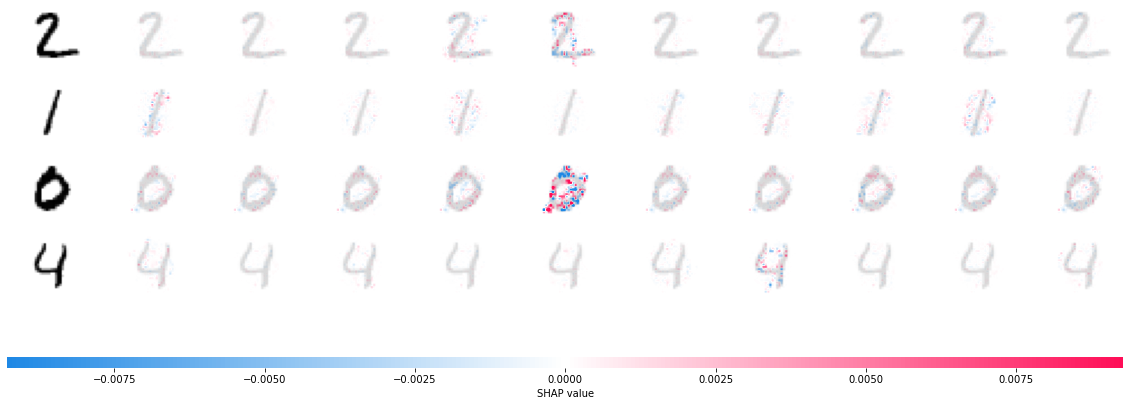

In [5]:
# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:5])

### Perform kernelShap

In [16]:
explainer = shap.KernelExplainer(model, x_train[0,:,:,0])
shap_values = explainer.shap_values(x_test[0,:,:,0], nsamples=10)

Provided model function fails when applied to the provided data set.


ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: (28, 28)

### Save keras/tf model

In [20]:
import tensorflow as tf

#savedmodel_dir = 'mnist_savedmodel'
#tf.saved_model.save(model, savedmodel_dir)

### Convert keras/tf model to onnx format

In [18]:
import onnx
import onnxruntime as ort
from onnx_tf.backend import prepare
# SavedModel to onnx
#onnx_savedmodel = 'mnist_savedmodel.onnx'
#!python -m tf2onnx.convert --saved-model {savedmodel_dir} --output {onnx_savedmodel} --signature_def serving_default --tag serve

Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.5.0 and strictly below 2.8.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.4.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons


### Load saved onnx model and convert it back to keras/tf model

In [21]:
onnx_model = onnx.load("mnist_savedmodel.onnx")  # load onnx model
#onnx_model = onnx.load("resnet50-v2-7.onnx")
tf_model_rep = prepare(onnx_model, gen_tensor_dict=True)
#tf_model_rep.export_graph("resnet50-v2-7", gen_tensor_dict=True)
tf_model = tf.saved_model.load("mnist_model_graph")

In [22]:
print(tf_model_rep.inputs) # Input nodes to the model
print('-----')
print(tf_model_rep.outputs) # Output nodes from the model
print('-----')
print(tf_model_rep.tensor_dict) # All nodes in the model

['conv2d_input']
-----
['dense_1']
-----
{'conv2d_input': <tf.Tensor 'conv2d_input:0' shape=(None, 28, 28, 1) dtype=float32>, 'new_shape__19': <tf.Variable 'new_shape__19:0' shape=(4,) dtype=int64>, 'const_fold_opt__20': <tf.Variable 'const_fold_opt__20:0' shape=(2,) dtype=int64>, 'StatefulPartitionedCall/sequential/dense_1/MatMul/ReadVariableOp:0': <tf.Variable 'StatefulPartitionedCall/sequential/dense_1/MatMul/ReadVariableOp_tf_0_22d881bb:0' shape=(128, 10) dtype=float32>, 'StatefulPartitionedCall/sequential/dense_1/BiasAdd/ReadVariableOp:0': <tf.Variable 'StatefulPartitionedCall/sequential/dense_1/BiasAdd/ReadVariableOp_tf_0_5081ee79:0' shape=(10,) dtype=float32>, 'StatefulPartitionedCall/sequential/dense/MatMul/ReadVariableOp:0': <tf.Variable 'StatefulPartitionedCall/sequential/dense/MatMul/ReadVariableOp_tf_0_c7a878d6:0' shape=(9216, 128) dtype=float32>, 'StatefulPartitionedCall/sequential/dense/BiasAdd/ReadVariableOp:0': <tf.Variable 'StatefulPartitionedCall/sequential/dense/Bias

### Check if the architecture of keras/tf model can be printed out

In [23]:
tf_model_rep.summary()

AttributeError: 'TensorflowRep' object has no attribute 'summary'

### Check if shap is able to work with the loaded keras/tf model

In [25]:
import shap
import numpy as np
#tf_model = tf.saved_model.load("resnet50-v2-7")
# shap using tf model
#e = shap.DeepExplainer(tf_model_rep, 0)
#e = shap.DeepExplainer(tf_model, 0)
explainer = shap.KernelExplainer(tf_model_rep, x_train[0,:,:,0])
shap_values = explainer.shap_values(x_test[0,:,:,0], nsamples=10)


Provided model function fails when applied to the provided data set.


TypeError: 'TensorflowRep' object is not callable